* * *
<pre> NYU Paris            <i> Machine Learning - Sumer 2023 </i></pre>
* * *


<h1 align="center"> Lab Unsupervised learning: clustering </h1>

<pre align="left"> June 08th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- More practice with numpy and matplotlib
- Understand the pros and cons of K-means clustering, hierarchical clustering and GMM

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

seed = 42

# Part 1: Implementing K-means

In the past labs, we have mainly seen:
- dimension reduction (with PCA)
- classification (i.e supervised learning)

In practice however, the vast majority of data does not have labels. Finding structure and patterns in data without labels is called unsupervised learning. Given a specified number of clusters K, the K-means algorithm forms a partition of your data with K different groups while trying to:
- minimize the variance within groups (i.e samples forming a group must be close to each other)
- maximize the variance between groups (i.e groups must be far from each other).

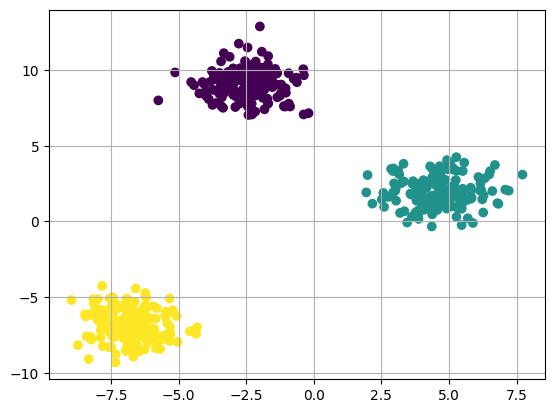

In [68]:
from sklearn.datasets import make_blobs

X, y = make_blobs(500, centers=3, n_features=2, cluster_std=1., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


It is called K-means because it only consists of two steps. Starting from an initialization of K mean values $M_k$:
- For each sample $x$ of your data, find the mean (centroid) $C_k$ that is closest to x. Assign $x$ to group $k$.
- Update the mean $C_k$ of each group k

### Question 1
Write a function that generates K random initializations for the group centroids $C_k$. 

In [31]:
def init_centroids(K, dimension=2):
    centroids = np.random.rand(K, dimension)
    return centroids

### Question 2
Write a function that takes the data X (n, d) and returns an array (n,) containing the id of the cluster it should be assigned to. For example, the function returns [0, 0, 2, 1, 2] if the first two samples are assigned to cluster 0, the 3rd and 5th samples to cluster 2 and the 4th sample to cluster 1. 

_Hint: look up `sklearn.metrics.pairwise_distances` and the numpy method of an array `array.argmin`_

In [32]:
from sklearn.metrics import pairwise_distances
import numpy as np
def assign_labels(X, centroids):
    distances = pairwise_distances(X, centroids)
    labels = np.argmin(distances, axis=1)
    return labels

### Question 3
The following cell visualizes the centroids and their assigned samples. Initialize the centroids and compute a first set of labels of your data and visualize them. Can you think of a smarter way to initialize these centroids using the data? (No need to implement it for now).

In [33]:
def plot_Kmeans_ud(X, labels, centroids):
    K = len(centroids)
    colors = np.array(cm.Set1(np.linspace(0., 1, K)))
    plt.figure()
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels], s=4, alpha=0.3)
    plt.scatter(centroids[:, 0], centroids[:, 1], color=colors, marker="^", s=100)
    plt.show()



To initialize centroids in a smarter way using the data, one common approach is to use K-means++ initialization. K-means++ is an algorithm for choosing the seeds for the K-means clustering algorithm. It spreads out the initial centroids to be as far away from each other as possible, which can lead to better convergence and avoid poor local optima.

### Question 4
Write a function that computes the new centroids using the assigned labels. Visualize the new centroids. Repeat these steps (label assignment + centroid update) for 2-3 steps. Does it converge?

In [34]:
def update_centroids(X, labels, centroids):
    K = len(centroids)
    new_centroids = np.zeros_like(centroids)
    
    for k in range(K):
        cluster_points = X[labels == k]
        
        if len(cluster_points) > 0:
            new_centroid = np.mean(cluster_points, axis=0)
            new_centroids[k] = new_centroid
        else:
            new_centroids[k] = centroids[k]
    
    return new_centroids

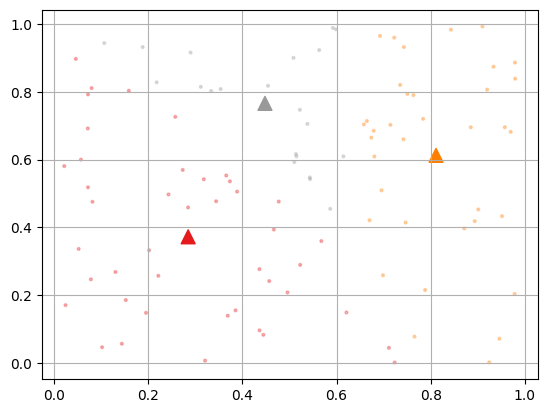

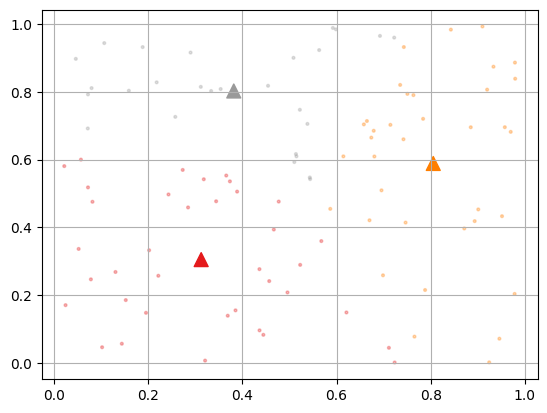

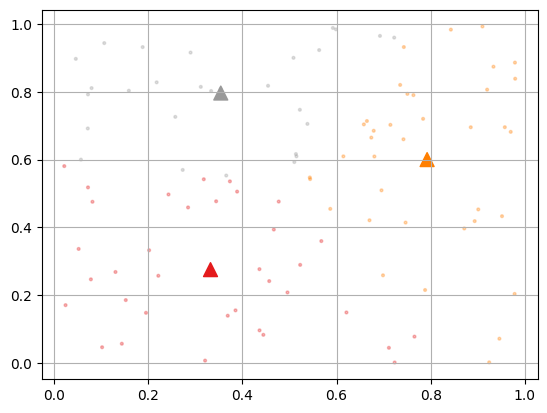

In [35]:
def Kmeans_ud(X, K, max_iters=3):
    centroids = init_centroids(K, X.shape[1])
    for _ in range(max_iters):
        labels = assign_labels(X, centroids)
        centroids = update_centroids(X, labels, centroids)
        plot_Kmeans_ud(X, labels, centroids)

# Trying out an example
X = np.random.rand(100, 2) 
K = 3  
Kmeans_ud(X, K, 3)

In the context of K-means clustering, we can observe convergence in about 3 iterations above since the centroids stabilize and do not change significantly between iterations. 

### Question 5
The K-means algorithm repeats these operations until the centroids stop changing. Write a function summing up all these operations.

In [36]:
def Kmeans_ud(X, K=3, maxiter=100, plot_steps=False):
    dimension = X.shape[1]
    centroids = init_centroids(K,dimension)
    for ii in range(maxiter):
        ## Kmeans_ud 2 steps to do
        labels = assign_labels(X,centroids)
        new_centroids = update_centroids(X, labels, centroids)

        if plot_steps:
            plot_Kmeans_ud(X, labels, centroids)

        if  np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


### Question 6

Generate different sets of data examples (changing the `cluster_std` parameter) and visualize the K-means output. What do you notice? 

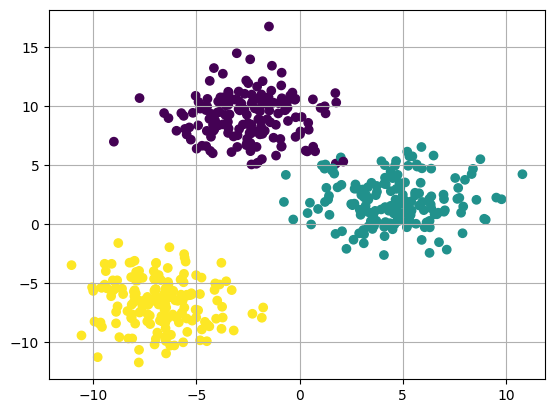

In [37]:
from sklearn.datasets import make_blobs

X_2, y = make_blobs(500, centers=3, n_features=2, cluster_std=2., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X_2[:, 0], X_2[:, 1], c=y)
plt.show()

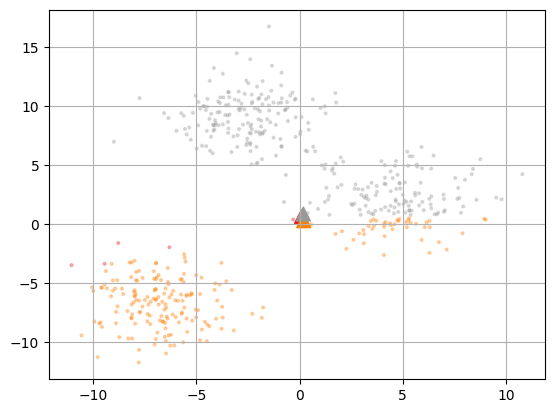

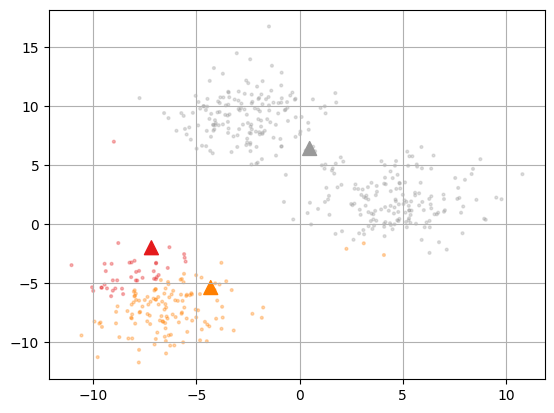

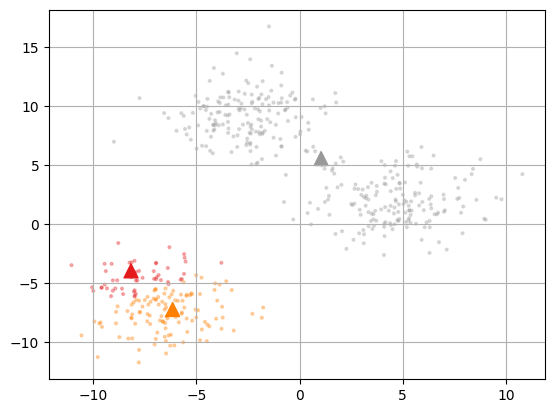

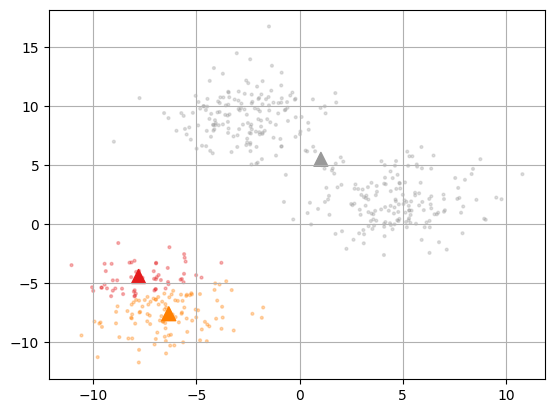

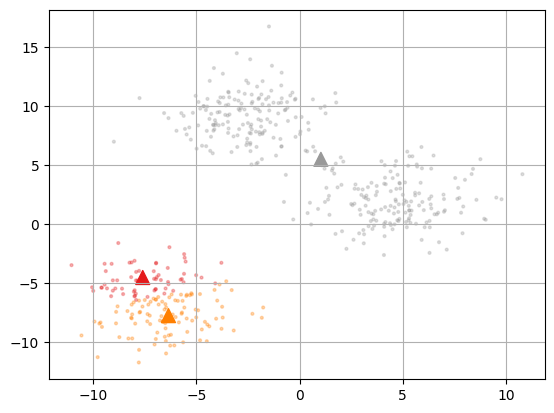

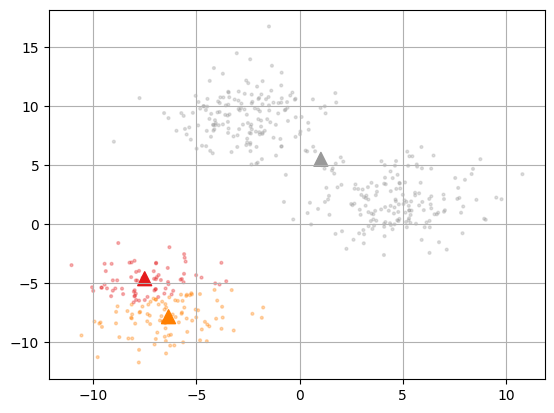

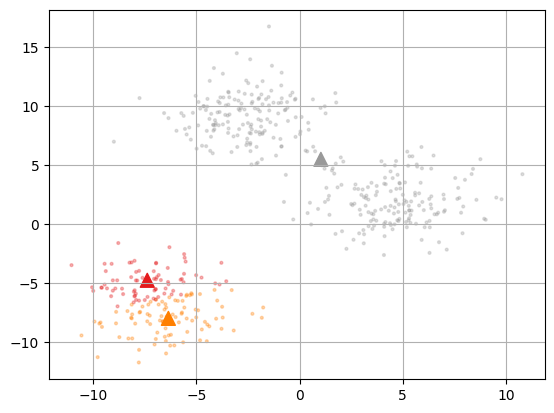

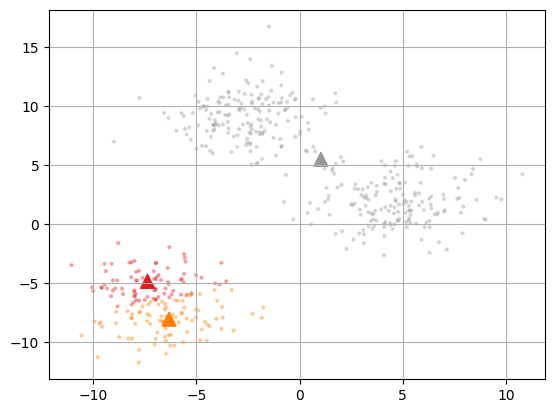

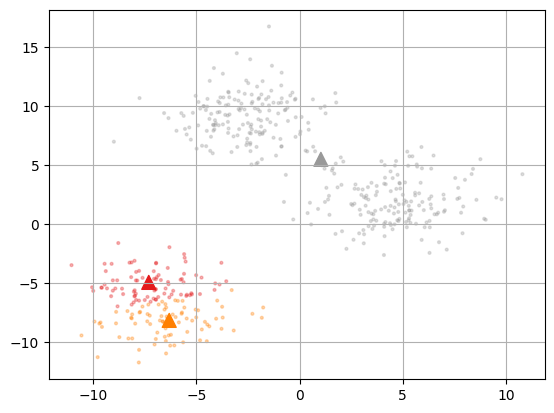

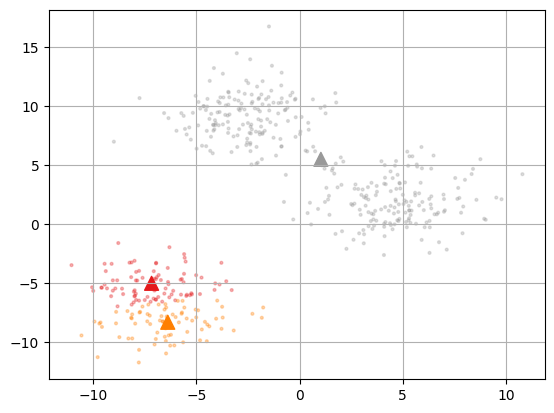

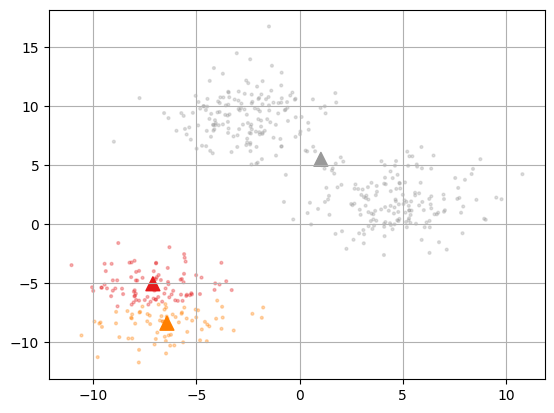

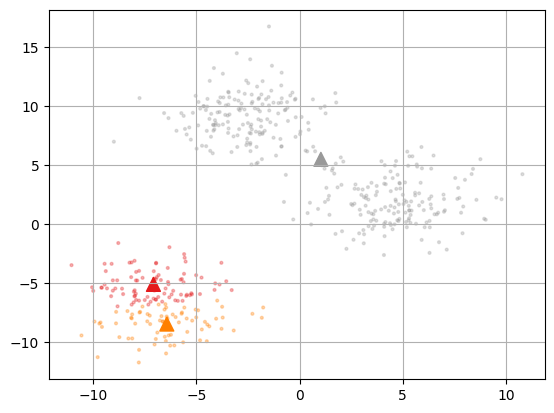

(array([1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
        2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 0,
        2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 0,
        2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1,
        0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2,
        2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2,
        2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2,
        2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2,
        0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2,
        2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2,
        2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 

In [38]:
Kmeans_ud(X_2, K=3, maxiter=100, plot_steps=True)

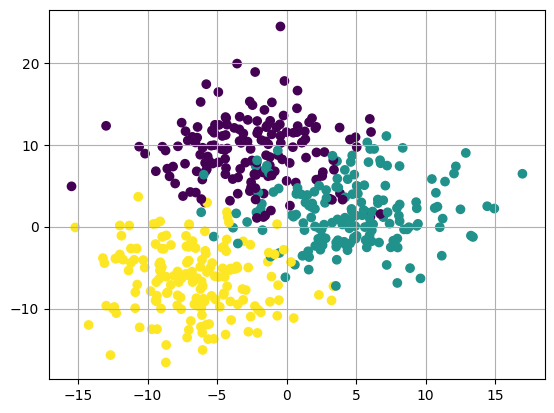

In [39]:
from sklearn.datasets import make_blobs

X_4, y = make_blobs(500, centers=3, n_features=2, cluster_std=4., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X_4[:, 0], X_4[:, 1], c=y)
plt.show()

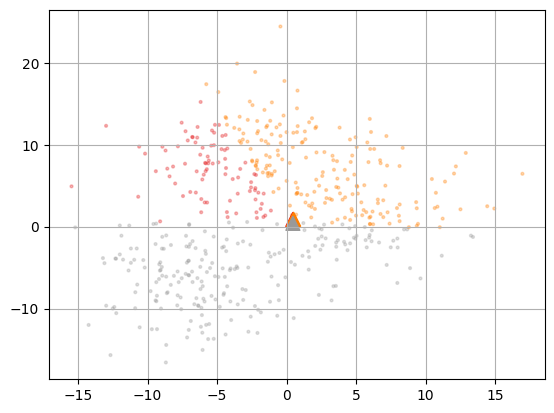

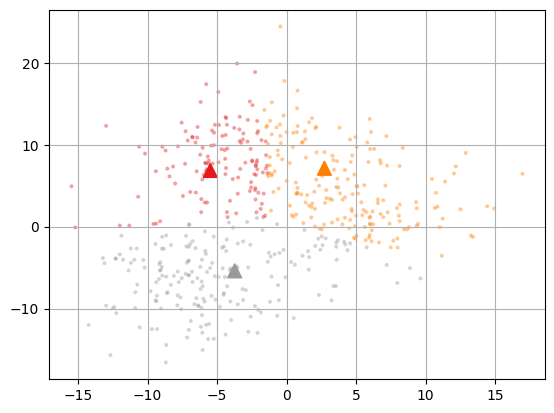

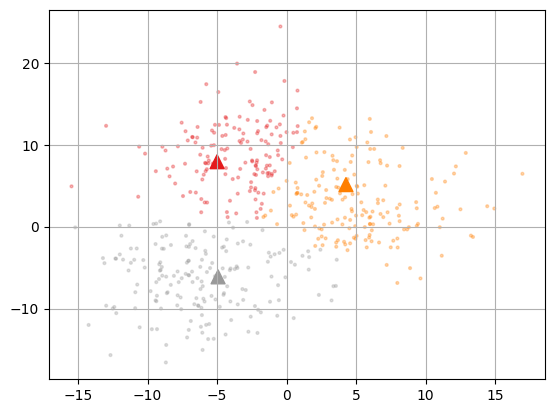

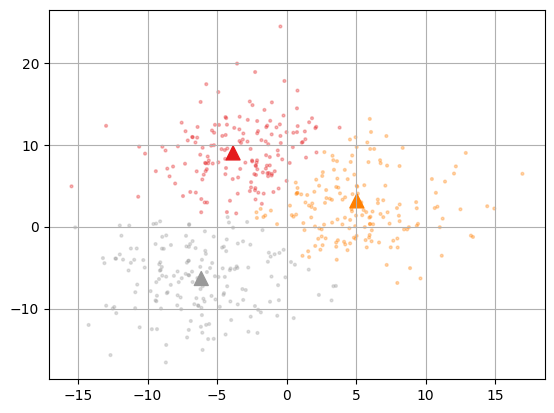

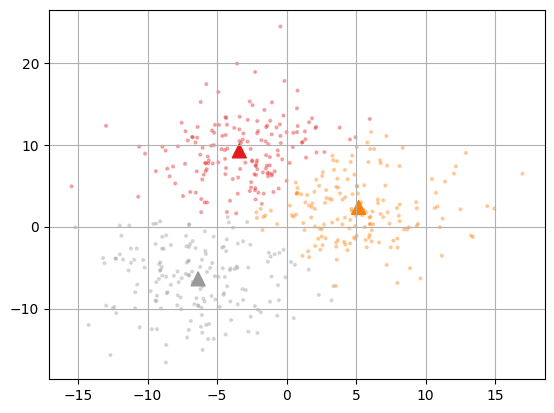

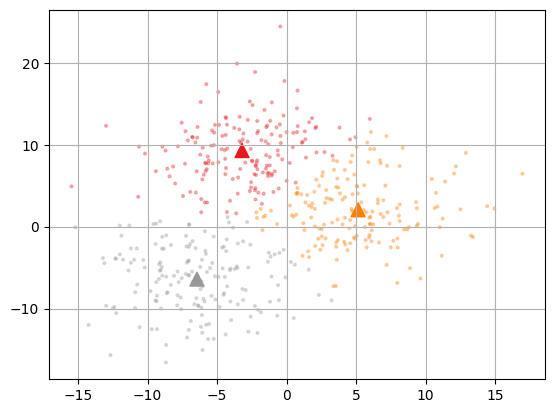

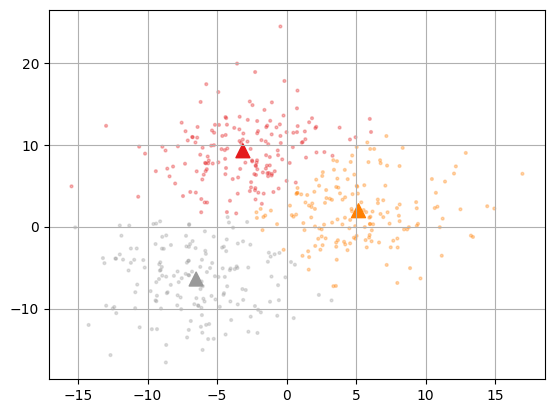

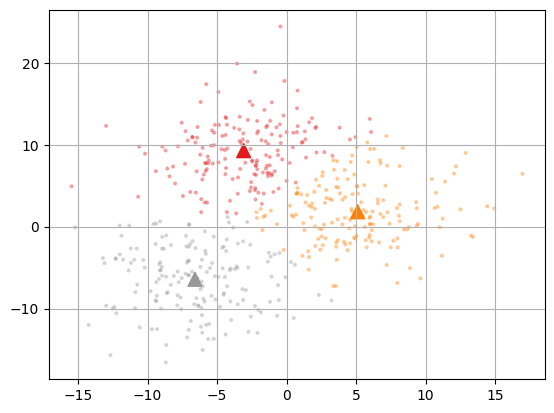

(array([2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1,
        1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2,
        1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0,
        1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2,
        2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1,
        0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0,
        0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0,
        0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0,
        2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1,
        0, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2,
        0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0,
        1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 

In [40]:
Kmeans_ud(X_4, K=3, maxiter=100, plot_steps=True)

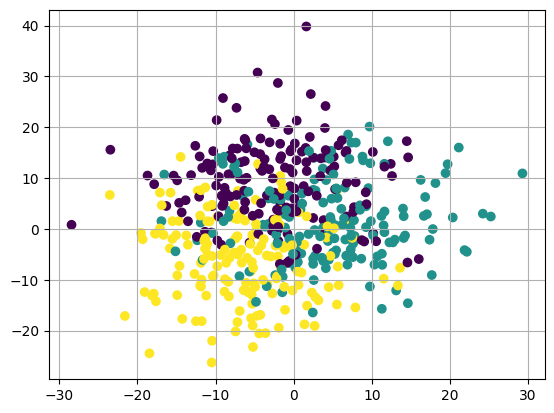

In [41]:
from sklearn.datasets import make_blobs

X_8, y = make_blobs(500, centers=3, n_features=2, cluster_std=8., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X_8[:, 0], X_8[:, 1], c=y)
plt.show()

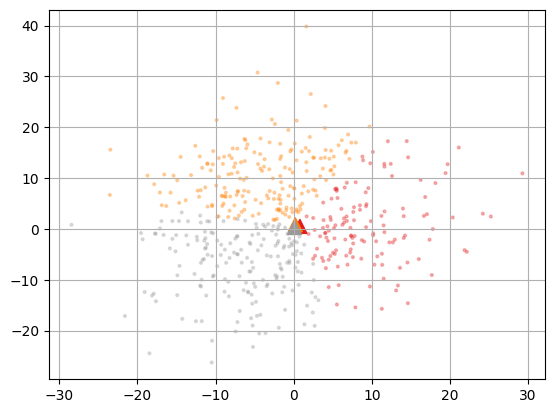

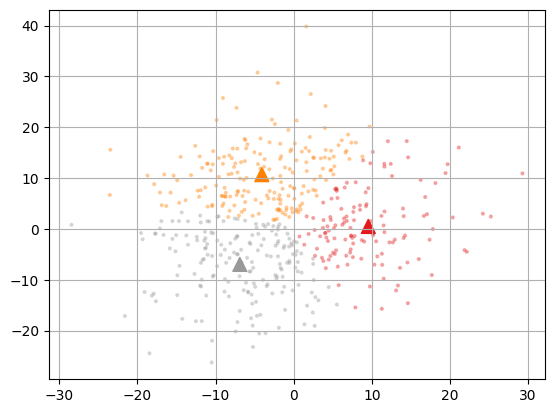

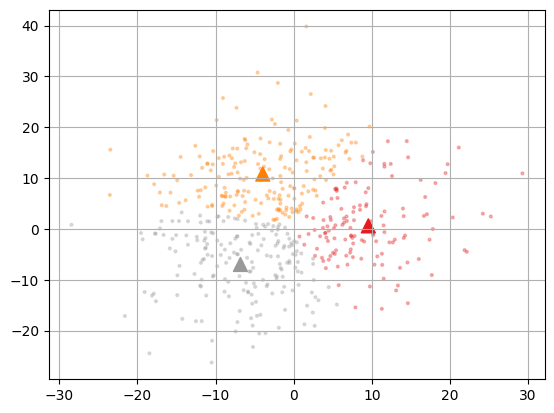

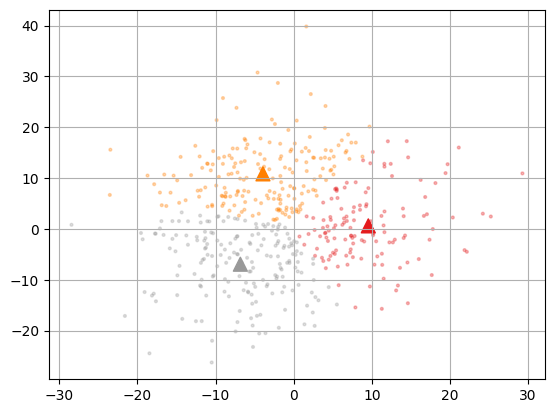

(array([2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2,
        0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0,
        0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1,
        0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1,
        2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2,
        2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0,
        2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
        1, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0,
        1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2,
        1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 2, 1,
        0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 

In [42]:
Kmeans_ud(X_8, K=3, maxiter=100, plot_steps=True)

As I increased the cluster_std, the spread or variance of the data within each cluster increased. This led to more dispersed clusters, potentially causing the centroids to move more slowly towards their final positions during each iteration of the K-means algorithm. 

It took 20+ iterations for cluster_stud = 8, for example.

Higher values of cluster_std can introduce more complex data distributions and increase the difficulty of partitioning the data into distinct clusters. As a result, the algorithm is possibly requiring more iterations to converge to a stable solution.

### Question 7
Try Kmeans_ud with this new data. Choose K wisely. Is it normal that Kmeans_ud fails?

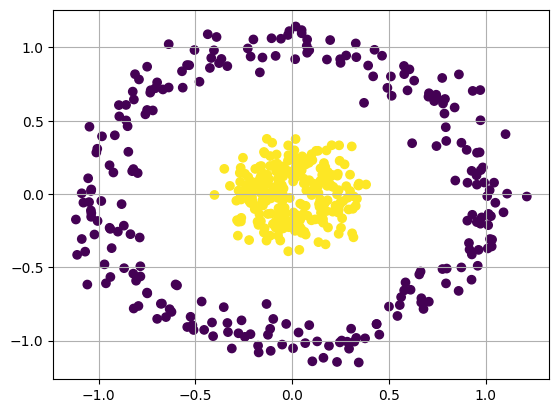

In [43]:
from sklearn.datasets import make_circles

X, y = make_circles(500, noise=0.1, factor=0.2)

plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Choosing K = 2

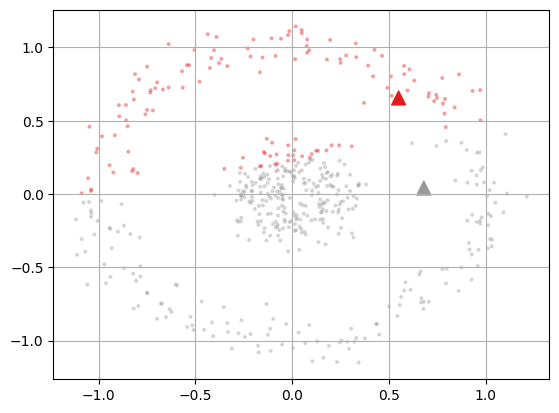

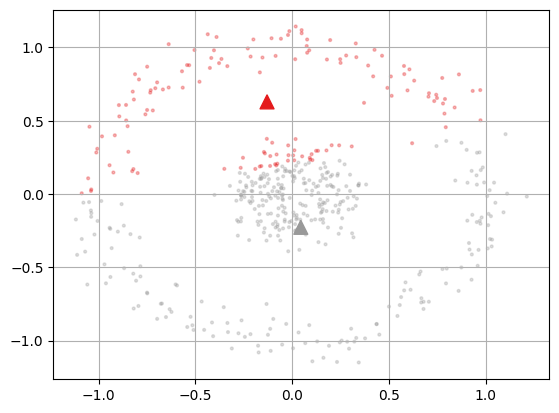

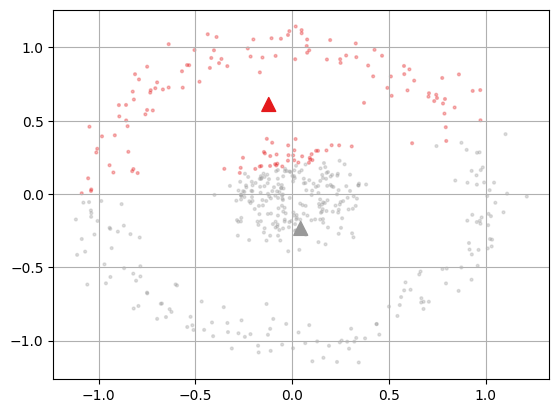

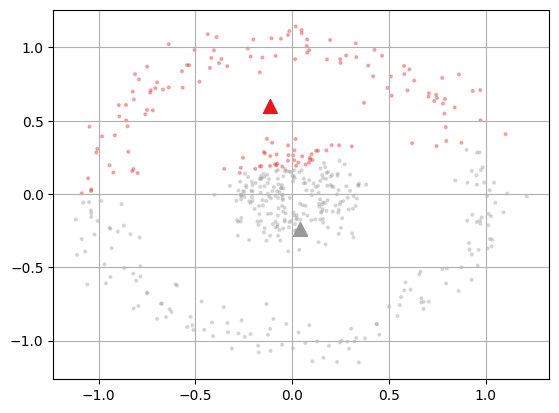

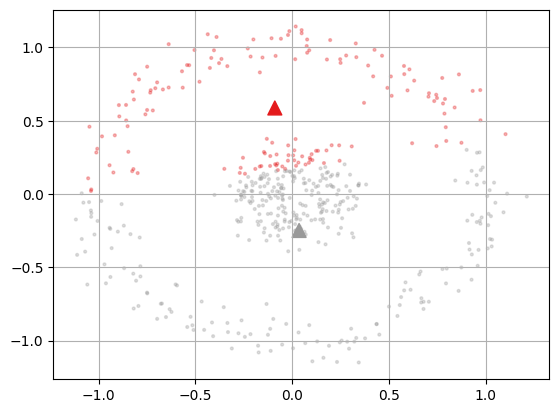

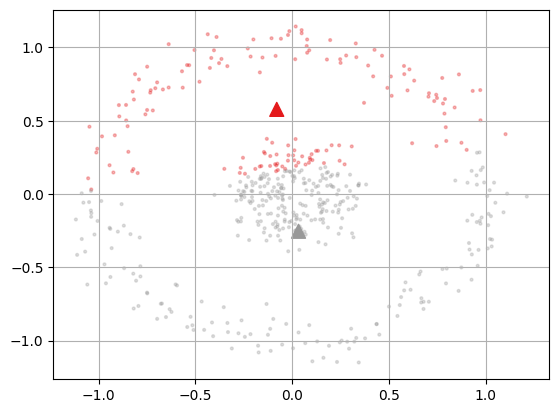

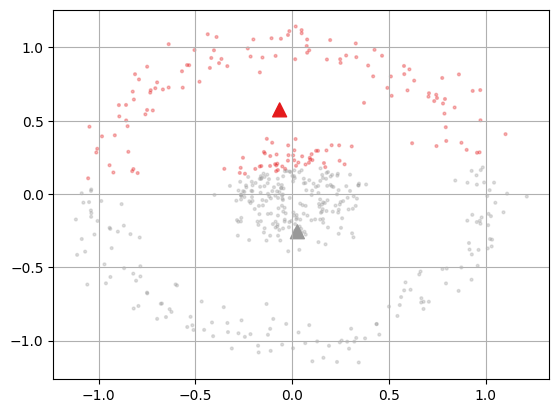

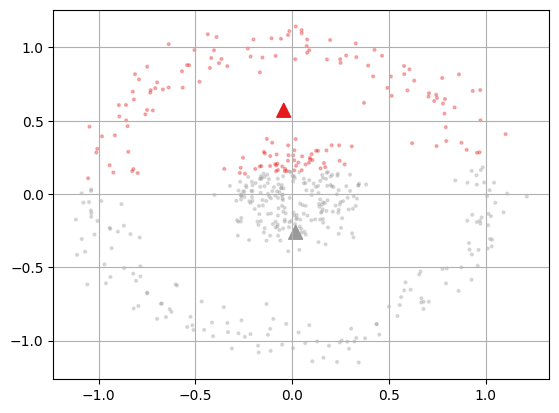

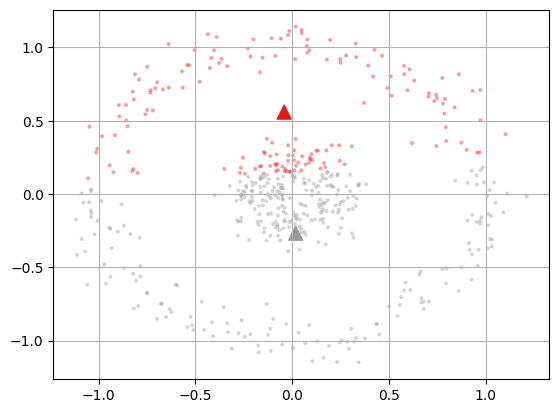

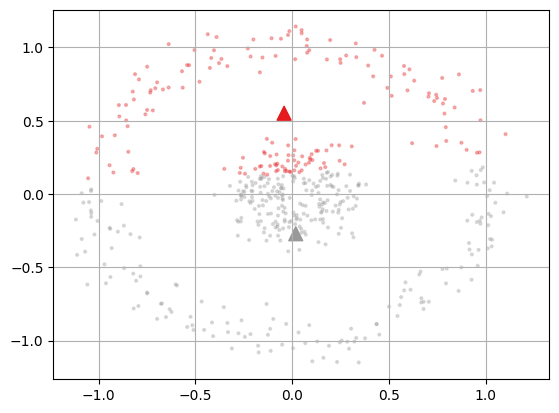

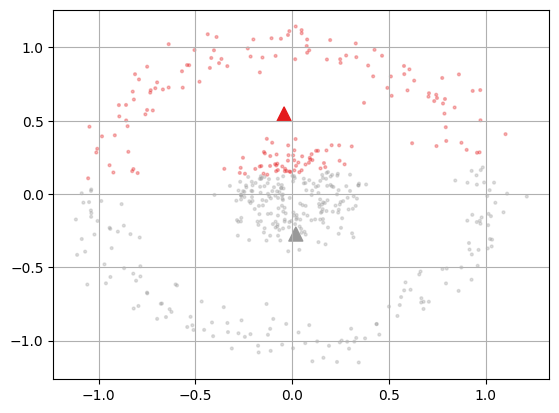

(array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 

In [44]:
Kmeans_ud(X,2,100,True)

K-means does not perform well on this dataset due to its non-linear and inherently circular structure. K-means is designed for linearly separable data and may struggle with complex, non-linear data distributions. Therefore, it's normal for K-means to fail or produce suboptimal results on such datasets.

# Part 2: Compressing images with K-means
Is it often the case that data is redundant. Take the example of the image below:

Image original shape:  (427, 640, 3)
Flower colors shape:  (273280, 3)


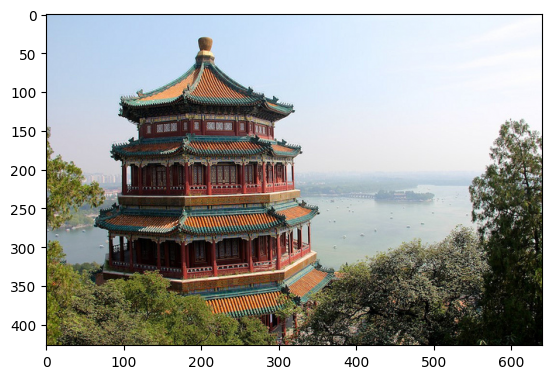

In [45]:
from sklearn.datasets import load_sample_image

flower = load_sample_image('china.jpg') / 255
flower_shape = flower.shape
flower_colors = flower.reshape(-1, 3)

print("Image original shape: ", flower_shape)
print("Flower colors shape: ", flower_colors.shape)

max_color = flower.max()

plt.figure()
plt.imshow(flower)
plt.show()

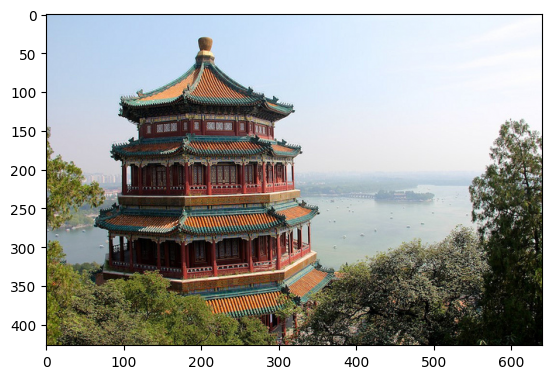

In [46]:
plt.imshow(flower)

### Question 8
We would like to replace all colors by replacing them with the centroid they're closest to. Let's for example reduce them to 16. Run the Kmeans_ud algorithm with K=16 on the downsampled colors array X. Then create a new image with the replaced colors and visualize it.

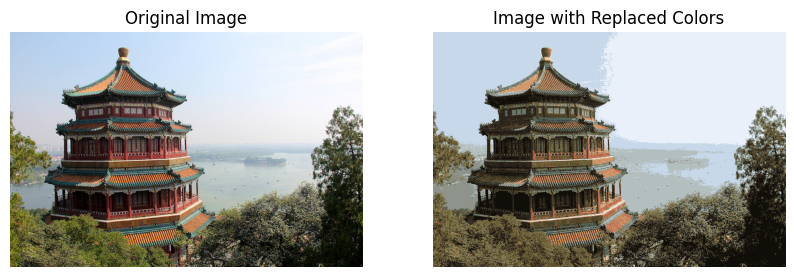

In [47]:
from sklearn.utils import shuffle
X = shuffle(flower_colors, random_state=0, n_samples=1_000)
km = Kmeans_ud(X,16)

centroids = km[1]


labels = assign_labels(flower_colors, centroids)


new_colors = centroids[labels]


new_image = new_colors.reshape(flower_shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(flower)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title('Image with Replaced Colors')
plt.axis('off')

plt.show()


In [48]:
flower_colors

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

### Question 9
Play around with the value of n_clusters (K). What do you notice?

K = 2

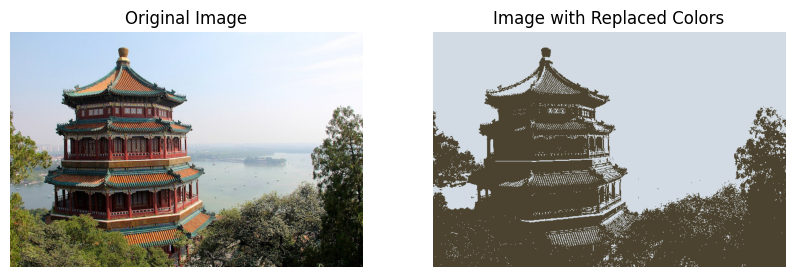

In [50]:
from sklearn.utils import shuffle
X = shuffle(flower_colors, random_state=0, n_samples=1_000)
km = Kmeans_ud(X,2)

centroids = km[1]


labels = assign_labels(flower_colors, centroids)


new_colors = centroids[labels]


new_image = new_colors.reshape(flower_shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(flower)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title('Image with Replaced Colors')
plt.axis('off')

plt.show()

K = 8

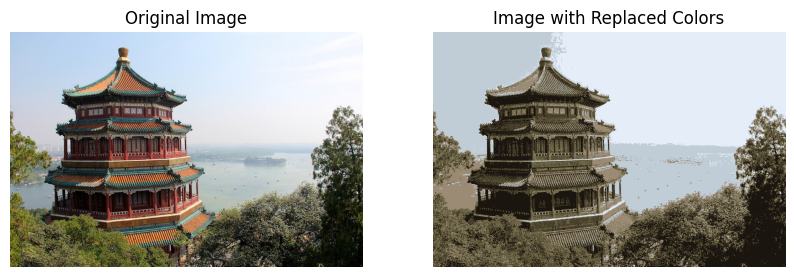

In [51]:
from sklearn.utils import shuffle
X = shuffle(flower_colors, random_state=0, n_samples=1_000)
km = Kmeans_ud(X,8)

centroids = km[1]


labels = assign_labels(flower_colors, centroids)


new_colors = centroids[labels]


new_image = new_colors.reshape(flower_shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(flower)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title('Image with Replaced Colors')
plt.axis('off')

plt.show()


K = 32

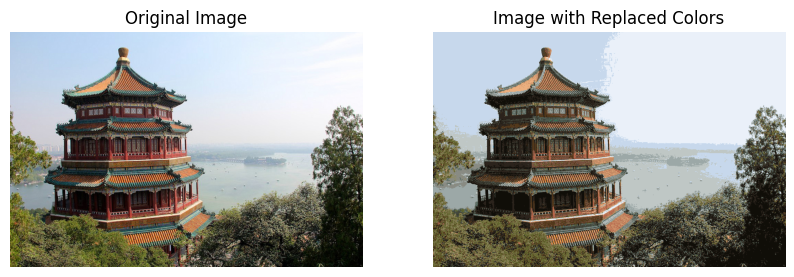

In [52]:
from sklearn.utils import shuffle
X = shuffle(flower_colors, random_state=0, n_samples=1_000)
km = Kmeans_ud(X,32)

centroids = km[1]


labels = assign_labels(flower_colors, centroids)


new_colors = centroids[labels]


new_image = new_colors.reshape(flower_shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(flower)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title('Image with Replaced Colors')
plt.axis('off')

plt.show()

K = 300

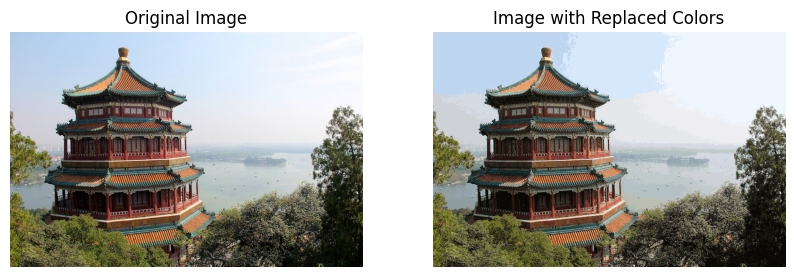

In [53]:
from sklearn.utils import shuffle
X = shuffle(flower_colors, random_state=0, n_samples=1_000)
km = Kmeans_ud(X,300)

centroids = km[1]


labels = assign_labels(flower_colors, centroids)


new_colors = centroids[labels]


new_image = new_colors.reshape(flower_shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(flower)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title('Image with Replaced Colors')
plt.axis('off')

plt.show()


Changing the value of n_clusters directly affects the quality of the compressed image Increasing n_clusters (i tried K=300) resulted in a higher fidelity image with more distinct colors, while decreasing n_clusters (i tried K = 2) leads to more lossy compression with fewer colors and more visible artifacts. Increased n_clusters lead to a compressed image that closely resembles the original, while decreased n_clusters result in a compressed image with noticeable color distortion or loss of detail. It takes a little more compression time for images with higher n_clusters. In this exploration, there is a trade-off between image quality and compression efficiency. 

### Question 10
Try this out but using the sklearn implementation of Kmeans. Do you obtain similar results? Can you explain the difference?

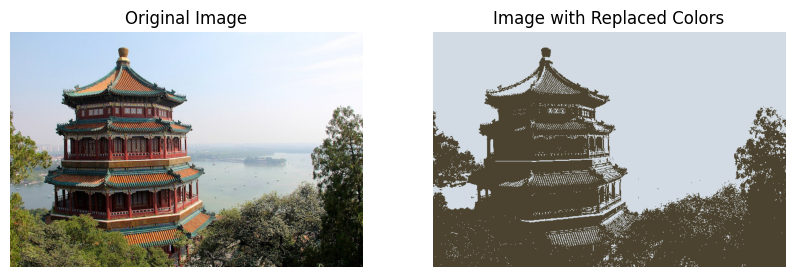

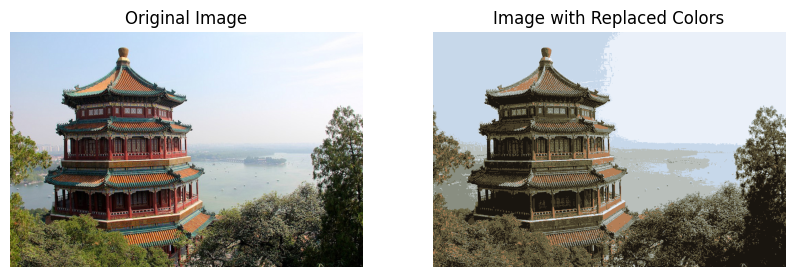

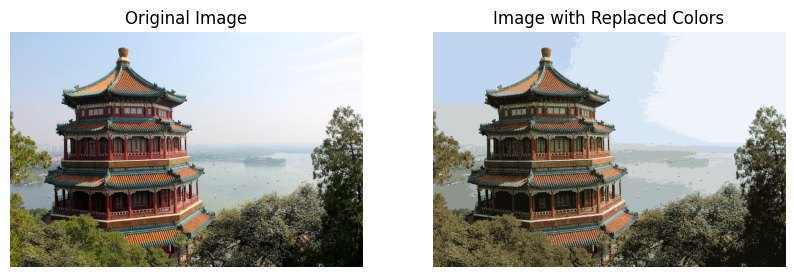

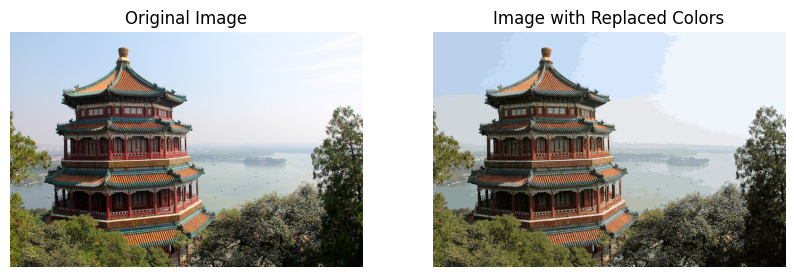

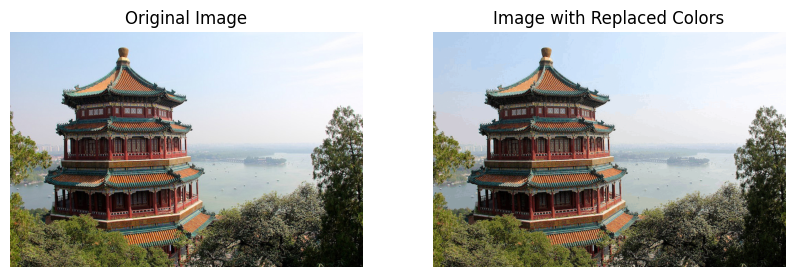

In [59]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# Looping over different N_clusters values
for i in [2,8,16,32,300]:
    X = shuffle(flower_colors, random_state=0, n_samples=1_000)
    km = KMeans(n_clusters=i).fit(X)

    centroids = km.cluster_centers_


    labels = km.predict(flower_colors)


    new_colors = centroids[labels]


    new_image = new_colors.reshape(flower_shape)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(flower)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(new_image)
    plt.title('Image with Replaced Colors')
    plt.axis('off')

    plt.show()



The results are very slightly different since the results with KMeans from scikit-learn have slightly better quality of compressed images, especially for higher n_clusters. For lower n_clusters, both custom kmeans and scikit kmeans produce similar results. The difference in quality between the scikit-learn implementation and my custom implementation of K-means clustering can probably be attributed to differences in optimization algorithms, initialization strategies, convergence criteria, and hyperparameter settings. Scikit-learn's implementation leverages efficient algorithms and default settings optimized for performance and quality, resulting in better-quality compressed images compared to custom implementations with simpler strategies and settings. For example, scikit-learn's K-means implementation employs a smart initialization strategy known as K-means++ by default. This initialization method selects initial cluster centers in a way that ensures a good spread of initial centroids across the data, leading to faster convergence and better quality solutions. On the other hand, my custom implementation uses a simpler initialization strategy, which is random initialization in "init_centroids", which can result in suboptimal clustering and lower-quality compressed images

# Part 3: Implementing  Hierarchical clustering


## Question 11

Implement a function that compute the distance matrix between data. The parameter 'distance' define the chosen distance on the Euclidean space. You can use functions from scipy or sklearn. Implement three distances of your choice.

In [60]:
from scipy.spatial.distance import cdist

def distance_matrix(X, distance='euclidean'):
    if distance == 'euclidean':
        matrix = cdist(X, X, metric='euclidean')
    elif distance == 'manhattan':
         matrix = cdist(X, X, metric='cityblock')
    elif distance == 'cosine':
        matrix = cdist(X, X, metric='cosine')
    else:
        raise ValueError("Invalid distance metric.")

    return matrix

## Question 12

Implement diffent similarity functions between clusters that you have seen in class (Linkage slide). Regarding the question 13, find a clever way to implement cluster variable (cluster1, cluster2).

In [61]:
def cluster_similarity(cluster1, cluster2, X, matrix_distance, linkage, distance='euclidean'):

    if linkage == 'single':
        similarity = np.min(matrix_distance[cluster1][:, cluster2])
    elif linkage == 'complete':
        similarity = np.max(matrix_distance[cluster1][:, cluster2])
    elif linkage == 'centroid':
        centroid1 = np.mean(X[cluster1], axis=0)
        centroid2 = np.mean(X[cluster2], axis=0)
        similarity = np.linalg.norm(centroid1 - centroid2)
    elif linkage == 'average':
        similarity = np.mean(matrix_distance[cluster1][:, cluster2])

    return similarity

Regarding Question 13, a clever way to implement the cluster variable could be to use a dictionary where the keys represent cluster identifiers (e.g., cluster indices or labels) and the values represent the indices of data points belonging to each cluster. This way, we can easily manipulate and access information about clusters in clustering, such as their size, member data points, etc. We can easily delete and add info in O(1) time when performing agglo/divise clustering)

## Question 13

Implement a function that performs Agglomerative Hierarchical Clustering.

In [71]:
def agglo_hier_clust(X, linkage, distance='euclidean'):

    # Initializing each data point as a separate cluster
    clusters = {i: [i] for i in range(len(X))}

    # Computing distance matrix
    dist_matrix = distance_matrix(X, distance)

    # Merging clusters iteratively until only one cluster remains
    while len(clusters) > 1:
        min_similarity = np.inf
        merge_indices = None

        # Finding the most similar pair of clusters to merge
        for i, cluster_i in clusters.items():
            for j, cluster_j in clusters.items():
                if i >= j:  
                    continue
                similarity = cluster_similarity(cluster_i, cluster_j, X, dist_matrix, linkage)
                if similarity < min_similarity:
                    min_similarity = similarity
                    merge_indices = (i, j)

        # Merging the most similar pair of clusters and storing new merged cluster
        merged_cluster = clusters[merge_indices[0]] + clusters[merge_indices[1]]
        del clusters[merge_indices[1]]
        del clusters[merge_indices[0]]
        clusters[len(clusters)] = merged_cluster

    return clusters


## Question 14 (Bonus)

Implement a function that performs Divisive Hierarchical Clustering.

In [66]:
def compute_distance(cluster_points, X):
    max_distance = -np.inf
    for i in range(len(cluster_points)):
        for j in range(i + 1, len(cluster_points)):
            distance = np.linalg.norm(X[cluster_points[i]] - X[cluster_points[j]])
            if distance > max_distance:
                max_distance = distance
    return max_distance

In [100]:
def divisive_hier_clust(X, linkage, threshold):
    # Initializing with all data points in one cluster
    clusters = {0: np.array(range(len(X)))}
    
    # Continued splitting of clusters until threshold is reached
    while len(clusters) < threshold:
        # Finding the cluster with the largest distance or maximum dissimilarity
        max_distance = -np.inf
        cluster_to_split = None
        for cluster_index, cluster_points in clusters.items():
            if len(cluster_points) <= 1:
                continue
            distance = compute_distance(cluster_points, X)
            if distance > max_distance:
                max_distance = distance
                cluster_to_split = cluster_index
        
        # Split the selected cluster into two subclusters based on centroids
        cluster_points = clusters[cluster_to_split]
        centroids = np.mean(X[cluster_points], axis=0)
        # Compute distances from the centroid
        distances = np.linalg.norm(X[cluster_points] - centroids, axis=1)
        median_distance = np.median(distances)

        # Apply boolean masks to get subclusters
        subcluster1 = cluster_points[distances < median_distance]
        subcluster2 = cluster_points[distances >= median_distance]

        
        # Deleting cluster to split and updating clusters dictionary with new subclusters
        clusters.pop(cluster_to_split)
        clusters[len(clusters)] = subcluster1
        clusters[len(clusters)] = subcluster2
    
    return clusters


## Question 15

Apply this (or these) algorithm(s) on the Gaussian blobs

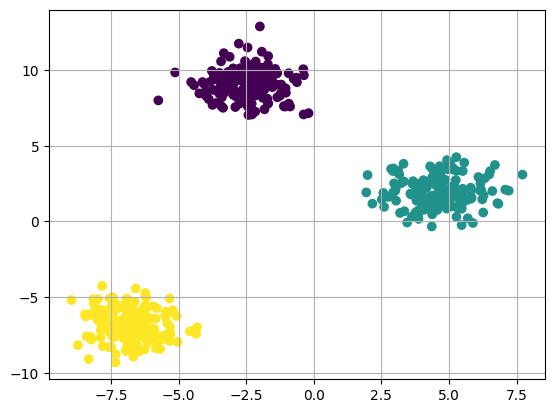

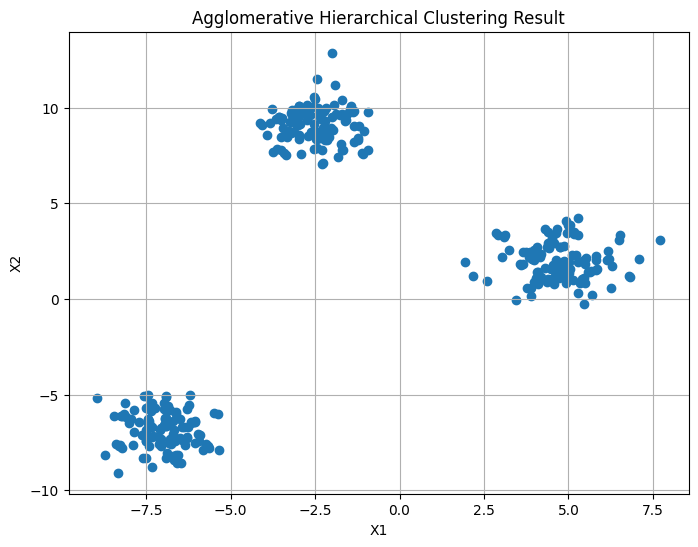

In [74]:
from sklearn.datasets import make_blobs

X, y = make_blobs(500, centers=3, n_features=2, cluster_std=1., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Apply agglomerative hierarchical clustering
agglomerative_clusters = agglo_hier_clust(X, linkage='single')

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster_index, cluster_points in agglomerative_clusters.items():
    plt.scatter(X[cluster_points, 0], X[cluster_points, 1])
plt.title('Agglomerative Hierarchical Clustering Result')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

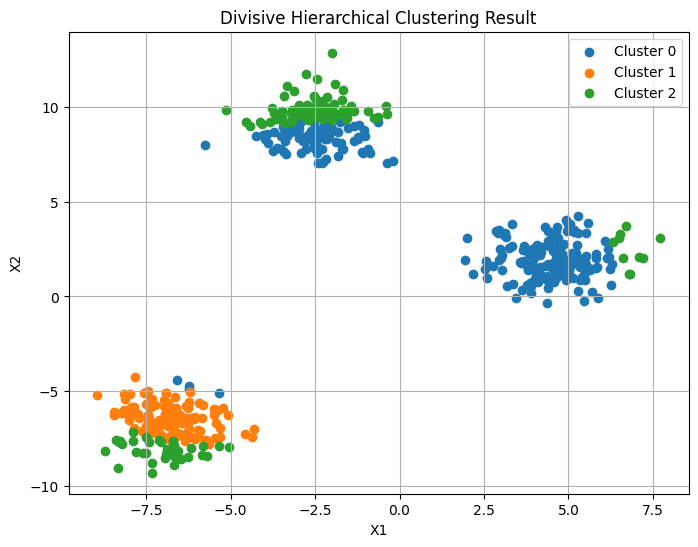

In [107]:
# Apply divisive hierarchical clustering
divisive_clusters = divisive_hier_clust(X, linkage='complete', threshold=3)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster_index, cluster_points in divisive_clusters.items():
    plt.scatter(X[cluster_points, 0], X[cluster_points, 1], label=f'Cluster {cluster_index}')
plt.title('Divisive Hierarchical Clustering Result')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

## Question 16

Use now the scipy implementation of the hierarchical clustering algorithm and visualize the associated dendrogram. How many clusters should you choose inspecting the dendrogram? According to this number of cluster, compute the accuracy of the algorithm

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage

Selecting 3 clusters

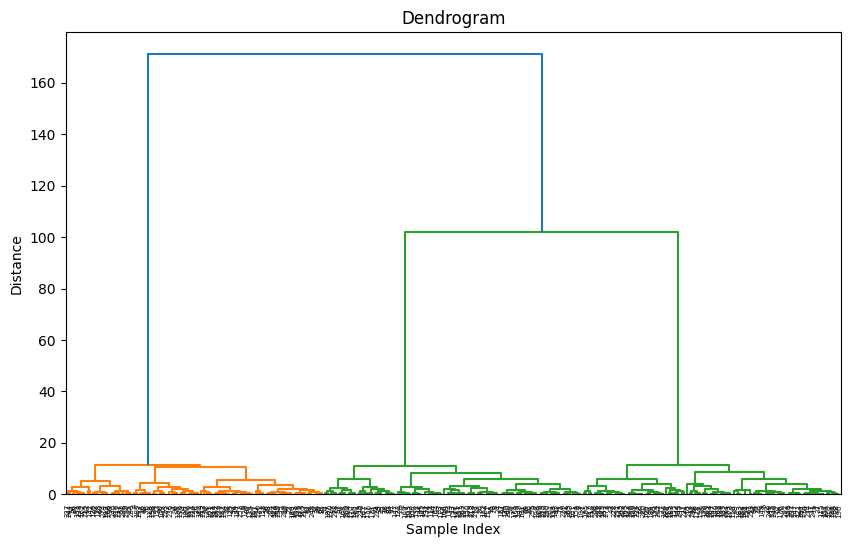

Accuracy: 0.3333333333333333


In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Making blobs
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1, random_state=42)

# Performing hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
cluster_labels = hierarchical.fit_predict(X)

# Visualizing the dendrogram
Z = linkage(X, method='ward')  # Generate the linkage matrix
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

# Computing accuracy
accuracy = accuracy_score(y, cluster_labels)
print("Accuracy:", accuracy)

# Part 4: Clustering Algorithms Comparison

## Question 17

- Import three images datasets as we did in previous labs: MNIST, FashionMNIST and CIFAR10. Vectorize these images to have vector input data.

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

# Setting up transformations to convert images to tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(x.size(0), -1))  # Flatten images
])

# Importing MNIST dataset and creating data loaders
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=False)

# Importing FashionMNIST dataset and creating data loaders
fashion_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fashion_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

fashion_train_loader = torch.utils.data.DataLoader(fashion_train, batch_size=64, shuffle=True)
fashion_test_loader = torch.utils.data.DataLoader(fashion_test, batch_size=64, shuffle=False)

# Importing CIFAR-10 dataset and creating data loaders
cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=64, shuffle=True)
cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=64, shuffle=False)

# Function to flatten images into vectors
def flatten_images(images):
    return images.view(images.size(0), -1).numpy()

# Vectorizing MNIST images
mnist_train_data = [(flatten_images(images), labels) for images, labels in mnist_train_loader]
mnist_test_data = [(flatten_images(images), labels) for images, labels in mnist_test_loader]

# Vectorizing FashionMNIST images
fashion_train_data = [(flatten_images(images), labels) for images, labels in fashion_train_loader]
fashion_test_data = [(flatten_images(images), labels) for images, labels in fashion_test_loader]

# Vectorizing CIFAR-10 images
cifar_train_data = [(flatten_images(images), labels) for images, labels in cifar_train_loader]
cifar_test_data = [(flatten_images(images), labels) for images, labels in cifar_test_loader]

Files already downloaded and verified
Files already downloaded and verified


## Question 18

- Perform K-means, Hierarchical clustering and Model-based algorithms (GMM) (you all have seen these algorithms in class). You can use these algorithms from sklearn. 

NB: use images of these datasets to perform clustering, keep the labels only to assign performances of your algorithms.

##### Kmeans on all 3 datasets

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Extracting flattened images and true labels from the train and test data
images_train, labels_train = zip(*mnist_train_data)
images_test, labels_test = zip(*mnist_test_data)

# Concatenating flattened images and true labels
images_train = np.concatenate(images_train)
labels_train = np.concatenate(labels_train)
images_test = np.concatenate(images_test)
labels_test = np.concatenate(labels_test)

# Performing k-means clustering on the training data
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(images_train)

# Getting cluster labels for training and test data
cluster_labels_train = kmeans.labels_
cluster_labels_test = kmeans.predict(images_test)

# Mapping each cluster label to the most frequent true label within that cluster
mapped_labels_train = np.zeros_like(cluster_labels_train)
for cluster_label in np.unique(cluster_labels_train):
    mask = (cluster_labels_train == cluster_label)
    mapped_labels_train[mask] = np.bincount(labels_train[mask]).argmax()

mapped_labels_test = np.zeros_like(cluster_labels_test)
for cluster_label in np.unique(cluster_labels_test):
    mask = (cluster_labels_test == cluster_label)
    mapped_labels_test[mask] = np.bincount(labels_test[mask]).argmax()

# Calculating accuracy on test set
accuracy = accuracy_score(labels_test, mapped_labels_test)
print("Accuracy:", accuracy)


Accuracy: 0.5332


In [193]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Extracting flattened images and true labels from the train and test data
images_train, labels_train = zip(*fashion_train_data)
images_test, labels_test = zip(*fashion_test_data)

# Concatenating flattened images and true labels
images_train = np.concatenate(images_train)
labels_train = np.concatenate(labels_train)
images_test = np.concatenate(images_test)
labels_test = np.concatenate(labels_test)

# Performing k-means clustering on the training data
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(images_train)

# Getting cluster labels for training and test data
cluster_labels_train = kmeans.labels_
cluster_labels_test = kmeans.predict(images_test)

# Mapping each cluster label to the most frequent true label within that cluster
mapped_labels_train = np.zeros_like(cluster_labels_train)
for cluster_label in np.unique(cluster_labels_train):
    mask = (cluster_labels_train == cluster_label)
    mapped_labels_train[mask] = np.bincount(labels_train[mask]).argmax()

mapped_labels_test = np.zeros_like(cluster_labels_test)
for cluster_label in np.unique(cluster_labels_test):
    mask = (cluster_labels_test == cluster_label)
    mapped_labels_test[mask] = np.bincount(labels_test[mask]).argmax()

# Calculating accuracy on test set
accuracy = accuracy_score(labels_test, mapped_labels_test)
print("Accuracy:", accuracy)


Accuracy: 0.5734


In [195]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Extracting flattened images and true labels from the train and test data
images_train, labels_train = zip(*cifar_train_data)
images_test, labels_test = zip(*cifar_test_data)

# Concatenating flattened images and true labels
images_train = np.concatenate(images_train)
labels_train = np.concatenate(labels_train)
images_test = np.concatenate(images_test)
labels_test = np.concatenate(labels_test)

# Performing k-means clustering on the training data
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(images_train)

# Getting cluster labels for training and test data
cluster_labels_train = kmeans.labels_
cluster_labels_test = kmeans.predict(images_test)

# Mapping each cluster label to the most frequent true label within that cluster
mapped_labels_train = np.zeros_like(cluster_labels_train)
for cluster_label in np.unique(cluster_labels_train):
    mask = (cluster_labels_train == cluster_label)
    mapped_labels_train[mask] = np.bincount(labels_train[mask]).argmax()

mapped_labels_test = np.zeros_like(cluster_labels_test)
for cluster_label in np.unique(cluster_labels_test):
    mask = (cluster_labels_test == cluster_label)
    mapped_labels_test[mask] = np.bincount(labels_test[mask]).argmax()

# Calculating accuracy on test set
accuracy = accuracy_score(labels_test, mapped_labels_test)
print("Accuracy:", accuracy)


Accuracy: 0.2252


#### Hierarchical Clustering on all 3 datasets

In [197]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

# Flattenening images and labels from the training set
images_train, labels_train = zip(*mnist_train_data)
images_train = np.concatenate(images_train)
labels_train = np.concatenate(labels_train)

# Flattenening images and labels from the test set
images_test, labels_test = zip(*mnist_test_data)
images_test = np.concatenate(images_test)
labels_test = np.concatenate(labels_test)

# Performing hierarchical clustering on the training set
hierarchical = AgglomerativeClustering(n_clusters=10)
hierarchical.fit(images_train)

# Getting cluster labels for training and test data
cluster_labels_train = hierarchical.labels_
cluster_labels_test = hierarchical.fit_predict(images_test)

# Mapping each cluster label to the most frequent true label within that cluster
mapped_labels_train = np.zeros_like(cluster_labels_train)
for cluster_label in np.unique(cluster_labels_train):
    mask = (cluster_labels_train == cluster_label)
    mapped_labels_train[mask] = np.bincount(labels_train[mask]).argmax()

mapped_labels_test = np.zeros_like(cluster_labels_test)
for cluster_label in np.unique(cluster_labels_test):
    mask = (cluster_labels_test == cluster_label)
    mapped_labels_test[mask] = np.bincount(labels_test[mask]).argmax()

# Calculating accuracy on test set
accuracy = accuracy_score(labels_test, mapped_labels_test)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

# Flattenening images and labels from the training set
images_train, labels_train = zip(*fashion_train_data)
images_train = np.concatenate(images_train)
labels_train = np.concatenate(labels_train)

# Flattenening images and labels from the test set
images_test, labels_test = zip(*fashion_test_data)
images_test = np.concatenate(images_test)
labels_test = np.concatenate(labels_test)

# Performing hierarchical clustering on the training set
hierarchical = AgglomerativeClustering(n_clusters=10)
hierarchical.fit(images_train)

# Getting cluster labels for training and test data
cluster_labels_train = hierarchical.labels_
cluster_labels_test = hierarchical.fit_predict(images_test)

# Mapping each cluster label to the most frequent true label within that cluster
mapped_labels_train = np.zeros_like(cluster_labels_train)
for cluster_label in np.unique(cluster_labels_train):
    mask = (cluster_labels_train == cluster_label)
    mapped_labels_train[mask] = np.bincount(labels_train[mask]).argmax()

mapped_labels_test = np.zeros_like(cluster_labels_test)
for cluster_label in np.unique(cluster_labels_test):
    mask = (cluster_labels_test == cluster_label)
    mapped_labels_test[mask] = np.bincount(labels_test[mask]).argmax()

# Calculating accuracy on test set
accuracy = accuracy_score(labels_test, mapped_labels_test)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

# Flattenening images and labels from the training set
images_train, labels_train = zip(*cifar_train_data)
images_train = np.concatenate(images_train)
labels_train = np.concatenate(labels_train)

# Flattenening images and labels from the test set
images_test, labels_test = zip(*cifar_test_data)
images_test = np.concatenate(images_test)
labels_test = np.concatenate(labels_test)

# Performing hierarchical clustering on the training set
hierarchical = AgglomerativeClustering(n_clusters=10)
hierarchical.fit(images_train)

# Getting cluster labels for training and test data
cluster_labels_train = hierarchical.labels_
cluster_labels_test = hierarchical.fit_predict(images_test)

# Mapping each cluster label to the most frequent true label within that cluster
mapped_labels_train = np.zeros_like(cluster_labels_train)
for cluster_label in np.unique(cluster_labels_train):
    mask = (cluster_labels_train == cluster_label)
    mapped_labels_train[mask] = np.bincount(labels_train[mask]).argmax()

mapped_labels_test = np.zeros_like(cluster_labels_test)
for cluster_label in np.unique(cluster_labels_test):
    mask = (cluster_labels_test == cluster_label)
    mapped_labels_test[mask] = np.bincount(labels_test[mask]).argmax()

# Calculating accuracy on test set
accuracy = accuracy_score(labels_test, mapped_labels_test)
print("Accuracy:", accuracy)


#### GMM on all 3 datasets

In [196]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

# Extracting flattened images and true labels from the train and test data
images_train, labels_train = zip(*fashion_train_data)
images_test, labels_test = zip(*fashion_test_data)

# Concatenating flattened images and true labels
images_train = np.concatenate(images_train)
labels_train = np.concatenate(labels_train)
images_test = np.concatenate(images_test)
labels_test = np.concatenate(labels_test)

# Performing Gaussian Mixture Model clustering on the training data
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(images_train)

# Predicting cluster labels for training and test data
cluster_labels_train = gmm.predict(images_train)
cluster_labels_test = gmm.predict(images_test)

# Assigning the most likely class label for each cluster
def assign_labels(cluster_labels, true_labels):
    mapped_labels = np.zeros_like(cluster_labels)
    for cluster in np.unique(cluster_labels):
        mask = (cluster_labels == cluster)
        true_label_counts = np.bincount(true_labels[mask])
        most_likely_label = np.argmax(true_label_counts)
        mapped_labels[mask] = most_likely_label
    return mapped_labels

mapped_labels_train = assign_labels(cluster_labels_train, labels_train)
mapped_labels_test = assign_labels(cluster_labels_test, labels_test)

# Calculating accuracy on test set
accuracy = accuracy_score(labels_test, mapped_labels_test)
print("Accuracy:", accuracy)


Accuracy: 0.5134


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

# Flattenening images and labels from the training set
images_train, labels_train = zip(*mnist_train_data)
images_train = np.concatenate(images_train)
labels_train = np.concatenate(labels_train)

# Flattenening images and labels from the test set
images_test, labels_test = zip(*mnist_test_data)
images_test = np.concatenate(images_test)
labels_test = np.concatenate(labels_test)

# Performing Gaussian Mixture Model clustering on the training set
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(images_train)

# Predicting cluster labels for training and test data
cluster_labels_train = gmm.predict(images_train)
cluster_labels_test = gmm.predict(images_test)

# Mapping each cluster label to the most frequent true label within that cluster
mapped_labels_train = np.zeros_like(cluster_labels_train)
for cluster_label in np.unique(cluster_labels_train):
    mask = (cluster_labels_train == cluster_label)
    mapped_labels_train[mask] = np.bincount(labels_train[mask]).argmax()

mapped_labels_test = np.zeros_like(cluster_labels_test)
for cluster_label in np.unique(cluster_labels_test):
    mask = (cluster_labels_test == cluster_label)
    mapped_labels_test[mask] = np.bincount(labels_test[mask]).argmax()

# Calculating accuracy on test set
accuracy = accuracy_score(labels_test, mapped_labels_test)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

# Flatten images and labels from the training set
images_train, labels_train = zip(*cifar_train_data)
images_train = np.concatenate(images_train)
labels_train = np.concatenate(labels_train)

# Flattenening images and labels from the test set
images_test, labels_test = zip(*cifar_test_data)
images_test = np.concatenate(images_test)
labels_test = np.concatenate(labels_test)

# Performing Gaussian Mixture Model clustering on the training set
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(images_train)

# Predicting cluster labels for training and test data
cluster_labels_train = gmm.predict(images_train)
cluster_labels_test = gmm.predict(images_test)

# Mapping each cluster label to the most frequent true label within that cluster
mapped_labels_train = np.zeros_like(cluster_labels_train)
for cluster_label in np.unique(cluster_labels_train):
    mask = (cluster_labels_train == cluster_label)
    mapped_labels_train[mask] = np.bincount(labels_train[mask]).argmax()

mapped_labels_test = np.zeros_like(cluster_labels_test)
for cluster_label in np.unique(cluster_labels_test):
    mask = (cluster_labels_test == cluster_label)
    mapped_labels_test[mask] = np.bincount(labels_test[mask]).argmax()

# Calculating accuracy on test set
accuracy = accuracy_score(labels_test, mapped_labels_test)
print("Accuracy:", accuracy)

## Question 19

Asses the performance of each algorithm.

On each dataset, describe what you observe. Overall, is there any algorithms that is better? If yes, why?

I printed the accuracy score above for each algorithm.

### MNIST Dataset:

- **K-Means**: K-Means clustering performs well on the MNIST dataset, as it can effectively partition the data into clusters based on pixel intensities. However, since K-Means assumes spherical clusters, it may not capture the complex shapes present in the data, which leads to suboptimal clustering.
  
- **Hierarchical Clustering**: Hierarchical clustering can capture the hierarchical structure present in the MNIST dataset, which may be beneficial for identifying clusters with different levels of granularity. However, it was expensive, especially for large datasets like MNIST.

- **Gaussian Mixture Model (GMM)**: As GMM clustering assumes that the data points are generated from a mixture of Gaussian distributions, it can capture complex cluster shapes and is more flexible compared to K-Means. However, GMM can be sensitive to initialization and clearly required more computational resources.

### FashionMNIST Dataset:

- **K-Means**: Similar to MNIST, K-Means can effectively partition the FashionMNIST dataset based on pixel intensities. However, it struggles with capturing complex patterns present in clothing images, leading to suboptimal clustering results.

- **Hierarchical Clustering**: Hierarchical clustering capture sthe hierarchical structure in the FashionMNIST dataset, allowing for identification of clusters at different levels of abstraction. However, like MNIST, it can be computationally expensive.

- **Gaussian Mixture Model (GMM)**: GMM clustering performs well on FashionMNIST due to its ability to capture complex cluster shapes. It can model the diversity of clothing items more effectively compared to K-Means. However, as with MNIST, GMM is sensitive to initialization and computationally demanding.

### CIFAR-10 Dataset:

- **K-Means**: K-Means may struggle with the CIFAR-10 dataset due to its higher dimensionality and complex image content (e.g., objects, animals, vehicles). It may not capture the diverse cluster shapes present in the dataset effectively.

- **Hierarchical Clustering**: Similar to K-Means, hierarchical clustering may face challenges with the high-dimensional and diverse nature of CIFAR-10 images. It may not scale well to large datasets like CIFAR-10.

- **Gaussian Mixture Model (GMM)**: GMM clustering may have better performance on CIFAR-10 compared to K-Means and hierarchical clustering due to its ability to capture complex cluster shapes and high-dimensional data. However, it may still face challenges with computational complexity and sensitivity to initialization.

### Overall:

- Among the three algorithms, *Gaussian Mixture Model (GMM)* clustering performs better overall due to its ability to capture complex cluster shapes and high-dimensional data. It can potentially outperform K-Means and hierarchical clustering, especially on datasets with diverse and complex patterns like FashionMNIST and CIFAR-10.

## Question 20

List pros and cons of each algorithms from what you have seen during the lab.

Here are the pros and cons of each algorithm based on what we have seen during the lab:

### K-means:

**Pros:**
1. Simple and easy to implement.
2. Scalable to large datasets.
3. Computationally efficient.
4. Works well with spherical clusters.
5. Often gives interpretable results.

**Cons:**
1. Assumes clusters are spherical and of equal size, which may not be true in real-world datasets.
2. Sensitive to initial cluster centroids, leading to potential convergence to local optima.
3. Requires the number of clusters to be specified a priori.
4. Does not work well with non-linear cluster boundaries or clusters of different shapes and sizes.
5. Prone to being influenced by outliers.

### Hierarchical Clustering:

**Pros:**
1. Does not require the number of clusters to be specified in prior.
2. Produces a hierarchical representation of the data, which can be visually inspected using dendrograms.
3. Can capture clusters of varying shapes and sizes.
4. Can be used to identify nested clusters at different levels of granularity.
5. Robust to noise and outliers.

**Cons:**
1. Computationally expensive, especially for large datasets.
2. Not easily scalable to high-dimensional data.
3. May be sensitive to the choice of distance metric and linkage method.
4. Once a decision is made to merge clusters, it cannot be undone.
5. Interpretation of results may be subjective, especially when dealing with complex dendrograms.

### Gaussian Mixture Model (GMM):

**Pros:**
1. Provides a soft clustering approach, where data points can belong to multiple clusters with different probabilities.
2. Can capture complex cluster shapes and densities.
3. Can model overlapping clusters effectively.
4. Allows for the estimation of cluster probabilities, useful for uncertainty estimation.
5. Flexibility in choosing the covariance structure of clusters.

**Cons:**
1. Computationally more expensive compared to K-means, especially for high-dimensional data.
2. May require a large number of components to accurately capture complex data distributions.
3. Sensitive to initialization of parameters, which can lead to convergence to local optima.
4. Interpretability of cluster assignments may be challenging, especially with overlapping clusters.
5. May not perform well with very large datasets due to computational complexity.
